In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from collections import Counter
import os

# Visualization aesthetics
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,5)
sns.set_style("whitegrid")

print("✅ Libraries imported successfully.")

✅ Libraries imported successfully.


In [3]:
import pandas as pd
from google.colab import files
uploaded = files.upload()
file = list(uploaded.keys())[0]

# Load dataset
df = pd.read_csv(file, low_memory=False)
df = df.copy()  # safe copy

print("✅ Dataset loaded:", file)
print("Shape:", df.shape)
display(df.head())

Saving Netflix Dataset.csv to Netflix Dataset (2).csv
✅ Dataset loaded: Netflix Dataset (2).csv
Shape: (7789, 11)


,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [4]:
df.columns = [c.strip().replace(' ','_').replace('-','_').lower() for c in df.columns]
print("Normalized Columns:\n", list(df.columns))
print("\nDataset Info:")
print(df.info())

Normalized Columns:
 ['show_id', 'category', 'title', 'director', 'cast', 'country', 'release_date', 'rating', 'duration', 'type', 'description']

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7789 non-null   object
 1   category      7789 non-null   object
 2   title         7789 non-null   object
 3   director      5401 non-null   object
 4   cast          7071 non-null   object
 5   country       7282 non-null   object
 6   release_date  7779 non-null   object
 7   rating        7782 non-null   object
 8   duration      7789 non-null   object
 9   type          7789 non-null   object
 10  description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB
None


In [5]:
# Check for missing values
missing = df.isnull().sum().sort_values(ascending=False)
display(missing.head(15))

# Drop duplicates
before = df.shape[0]
df.drop_duplicates(inplace=True)
after = df.shape[0]

print(f"✅ Removed {before-after} duplicate rows. Final shape: {df.shape}")

,0
director,2388
cast,718
country,507
release_date,10
rating,7
show_id,0
category,0
title,0
duration,0
type,0


✅ Removed 2 duplicate rows. Final shape: (7787, 11)


In [6]:
text_cols = df.select_dtypes(include=['object']).columns
for col in text_cols:
    df[col] = df[col].astype(str).str.strip()
    df[col] = df[col].replace({'nan': np.nan, 'NaN': np.nan, '': np.nan, 'None': np.nan})

print("✅ Text fields cleaned successfully.")

✅ Text fields cleaned successfully.


In [8]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['release_year'] = df['release_date'].dt.year
df['release_month'] = df['release_date'].dt.month
df['release_month_name'] = df['release_date'].dt.month_name()

df['release_year'] = pd.to_numeric(df.get('release_year', np.nan), errors='coerce')

print("✅ Date columns parsed and new features created.")
display(df[['release_date','release_year']].head())

✅ Date columns parsed and new features created.


,release_date,release_year
0,2020-08-14,2020.0
1,2016-12-23,2016.0
2,2018-12-20,2018.0
3,2017-11-16,2017.0
4,2020-01-01,2020.0


In [9]:
import re
if 'duration' in df.columns:
    def parse_duration(x):
        if pd.isna(x): return (np.nan, np.nan)
        s = str(x).lower()
        m = re.search(r'(\d+)', s)
        num = int(m.group(1)) if m else np.nan
        unit = 'seasons' if 'season' in s else ('minutes' if 'min' in s else 'other')
        return (num, unit)

    parsed = df['duration'].apply(parse_duration)
    df['duration_num'] = parsed.apply(lambda x: x[0])
    df['duration_unit'] = parsed.apply(lambda x: x[1])

print("✅ Duration column parsed.")
display(df[['duration','duration_num','duration_unit']].head())

✅ Duration column parsed.


,duration,duration_num,duration_unit
0,4 Seasons,4,seasons
1,93 min,93,minutes
2,78 min,78,minutes
3,80 min,80,minutes
4,123 min,123,minutes


In [11]:
def split_to_list(val):
    if pd.isna(val): return []
    return [v.strip() for v in str(val).split(',') if v.strip()!='']

df['genres'] = df.get('type', pd.Series(dtype=object)).apply(split_to_list)
df['countries'] = df.get('country', pd.Series(dtype=object)).apply(split_to_list)

print("✅ Genres and countries columns created.")
display(df[['title','genres','countries']].head())

✅ Genres and countries columns created.


,title,genres,countries
0,3%,"[International TV Shows, TV Dramas, TV Sci-Fi ...",[Brazil]
1,07:19,"[Dramas, International Movies]",[Mexico]
2,23:59,"[Horror Movies, International Movies]",[Singapore]
3,9,"[Action & Adventure, Independent Movies, Sci-F...",[United States]
4,21,[Dramas],[United States]


In [12]:
df.to_csv("Netflix_Cleaned_TejasV.csv", index=False)
print("✅ Clean dataset saved as Netflix_Cleaned_TejasV.csv")

✅ Clean dataset saved as Netflix_Cleaned_TejasV.csv


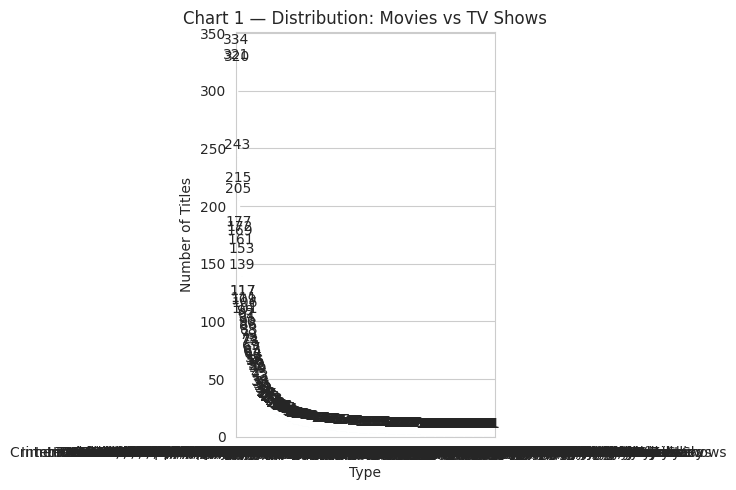


Counts:
 type
Documentaries                                                  334
Stand-Up Comedy                                                321
Dramas, International Movies                                   320
Comedies, Dramas, International Movies                         243
Dramas, Independent Movies, International Movies               215
                                                              ... 
Crime TV Shows, International TV Shows, TV Sci-Fi & Fantasy      1
Docuseries, Science & Nature TV, TV Action & Adventure           1
British TV Shows, Classic & Cult TV, Kids' TV                    1
Docuseries, TV Sci-Fi & Fantasy                                  1
Children & Family Movies, Dramas, Music & Musicals               1
Name: count, Length: 492, dtype: int64


In [13]:
# Movies vs TV Shows chart — defensive and annotated

if 'type' in df.columns:
    type_counts = df['type'].fillna('Unknown').value_counts()
    plt.figure(figsize=(7,5))
    ax = sns.barplot(x=type_counts.index, y=type_counts.values)
    ax.set_title("Chart 1 — Distribution: Movies vs TV Shows")
    ax.set_ylabel("Number of Titles")
    ax.set_xlabel("Type")
    # add labels on top of bars
    for p in ax.patches:
        ax.annotate(format(int(p.get_height()), ','),
                    (p.get_x()+p.get_width()/2., p.get_height()),
                    ha='center', va='center', xytext=(0,8), textcoords='offset points')
    plt.tight_layout()
    plt.show()
    print("\nCounts:\n", type_counts)
else:
    print("ℹ️ Skipped Chart 1 — column 'type' not present.")

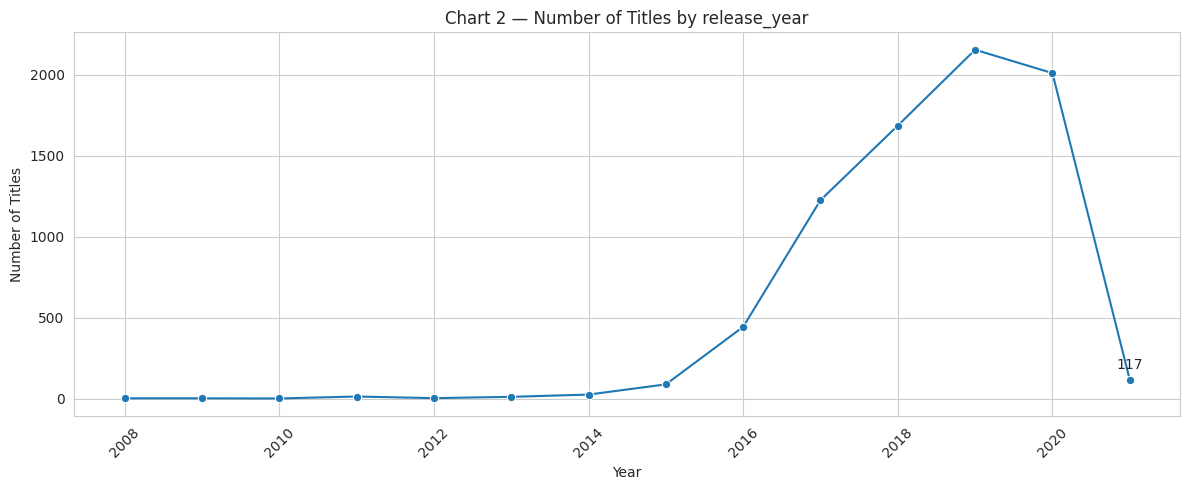


Last 10 years (or entries):


,release_year,count
4,2012.0,3
5,2013.0,11
6,2014.0,25
7,2015.0,88
8,2016.0,443
9,2017.0,1225
10,2018.0,1685
11,2019.0,2153
12,2020.0,2009
13,2021.0,117


In [14]:
# Titles by year (prefers added_year then release_year)
year_col = None
for c in ['added_year','release_year','release_date_year']:
    if c in df.columns and df[c].notna().sum()>0:
        year_col = c
        break

if year_col:
    yearly = df.groupby(year_col).size().reset_index(name='count').sort_values(by=year_col)
    yearly = yearly.dropna(subset=[year_col])
    plt.figure(figsize=(12,5))
    ax = sns.lineplot(data=yearly, x=year_col, y='count', marker='o')
    ax.set_title(f"Chart 2 — Number of Titles by {year_col}")
    ax.set_xlabel("Year")
    ax.set_ylabel("Number of Titles")
    # annotate last point
    if not yearly.empty:
        last_x = yearly[year_col].iloc[-1]
        last_y = yearly['count'].iloc[-1]
        ax.annotate(f"{int(last_y)}", xy=(last_x, last_y), xytext=(0,8), textcoords='offset points', ha='center')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    print("\nLast 10 years (or entries):")
    display(yearly.tail(10))
else:
    print("ℹ️ Skipped Chart 2 — no usable year column found.")

In [18]:
# Titles by month (seasonality) — uses added_month_name if available
if 'added_month_name' in df.columns and df['added_month_name'].notna().sum()>0:
    months_order = ['January','February','March','April','May','June','July','August','September','October','November','December']
    month_counts = df['added_month_name'].value_counts().reindex(months_order).fillna(0)
    plt.figure(figsize=(12,5))
    ax = sns.barplot(x=month_counts.index, y=month_counts.values)
    ax.set_title("Chart 3 — Titles Added by Month (Seasonality)")
    ax.set_ylabel("Number of Titles Added")
    ax.set_xlabel("Month")
    plt.xticks(rotation=45)
    for p in ax.patches:
        ax.annotate(int(p.get_height()), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0,8), textcoords='offset points')
    plt.tight_layout()
    plt.show()
    print("\nMonth counts (Jan-Dec):")
    display(month_counts)
else:
    print("ℹ️ Skipped Chart 3 — 'added_month_name' not available.")

ℹ️ Skipped Chart 3 — 'added_month_name' not available.


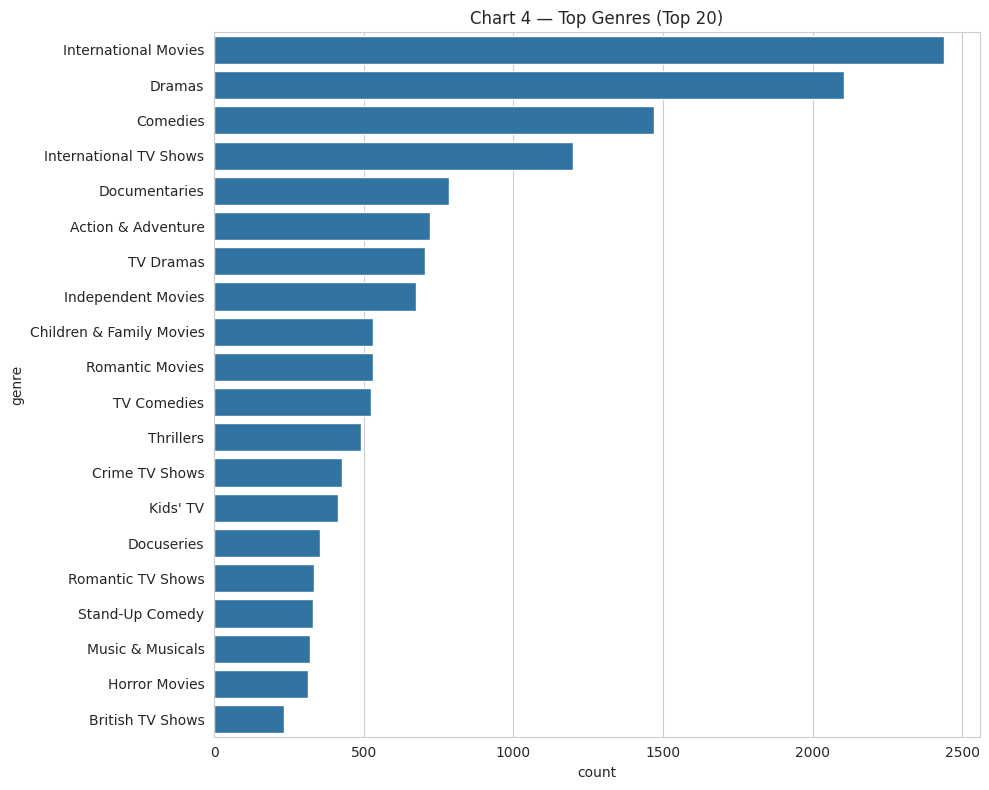

,genre,count
0,International Movies,2437
1,Dramas,2106
2,Comedies,1471
3,International TV Shows,1199
4,Documentaries,786
5,Action & Adventure,721
6,TV Dramas,704
7,Independent Movies,673
8,Children & Family Movies,532
9,Romantic Movies,531


In [19]:
# Top genres bar chart
if 'genres' in df.columns:
    all_genres = Counter()
    for glist in df['genres']:
        if isinstance(glist, list):
            for g in glist:
                if g and g.lower() not in ['nan','none','[]']:
                    all_genres[g] += 1
    top_genres = pd.DataFrame(all_genres.most_common(20), columns=['genre','count'])
    if not top_genres.empty:
        plt.figure(figsize=(10,8))
        ax = sns.barplot(y='genre', x='count', data=top_genres)
        ax.set_title("Chart 4 — Top Genres (Top 20)")
        plt.tight_layout()
        plt.show()
        display(top_genres.head(15))
    else:
        print("No genres counted (empty).")
else:
    print("ℹ️ Skipped Chart 4 — 'genres' column missing.")

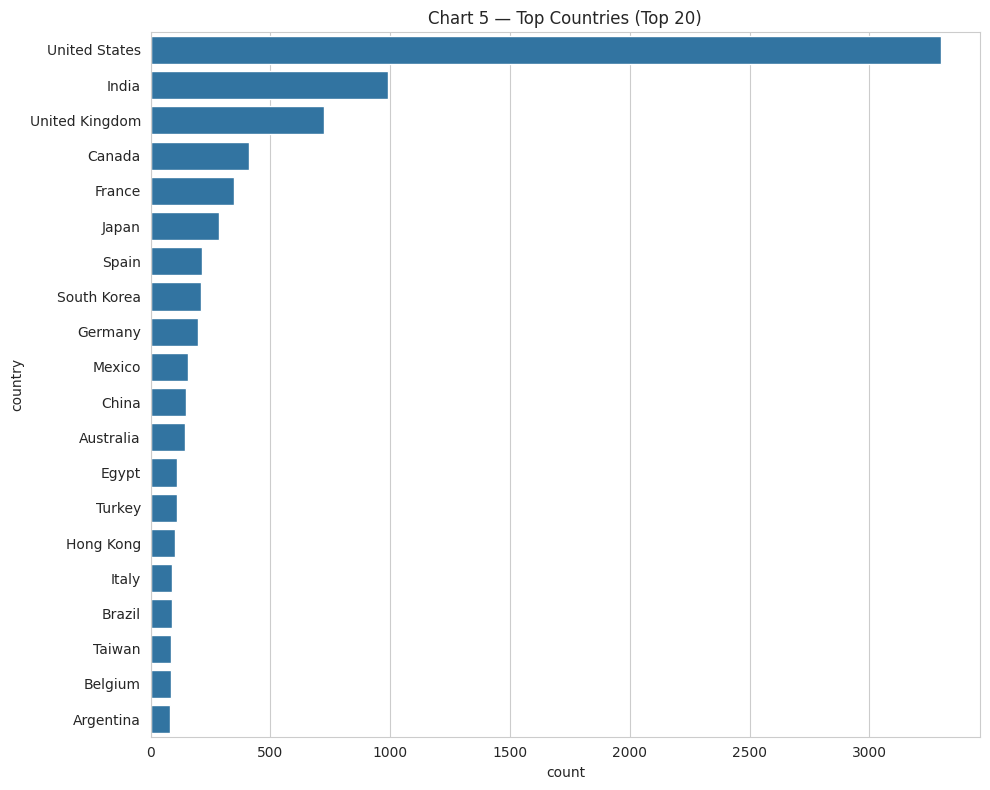

,country,count
0,United States,3297
1,India,990
2,United Kingdom,723
3,Canada,412
4,France,349
5,Japan,287
6,Spain,215
7,South Korea,212
8,Germany,199
9,Mexico,154


In [20]:
# Top countries bar chart
if 'countries' in df.columns:
    all_countries = Counter()
    for clist in df['countries']:
        if isinstance(clist, list):
            for c in clist:
                if c and c.lower() not in ['nan','none','[]']:
                    all_countries[c] += 1
    top_countries = pd.DataFrame(all_countries.most_common(20), columns=['country','count'])
    if not top_countries.empty:
        plt.figure(figsize=(10,8))
        ax = sns.barplot(y='country', x='count', data=top_countries)
        ax.set_title("Chart 5 — Top Countries (Top 20)")
        plt.tight_layout()
        plt.show()
        display(top_countries.head(15))
    else:
        print("No countries counted (empty).")
else:
    print("ℹ️ Skipped Chart 5 — 'countries' column missing.")

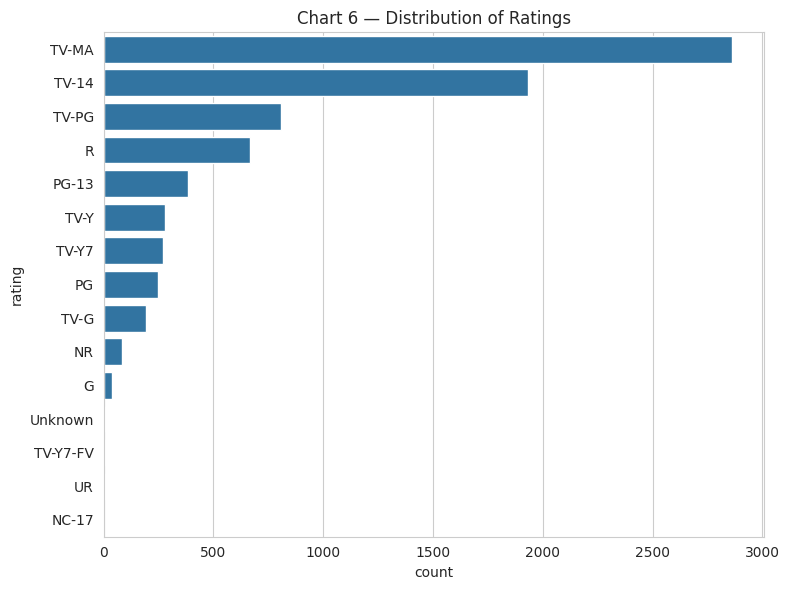

,rating,count
0,TV-MA,2863
1,TV-14,1931
2,TV-PG,806
3,R,665
4,PG-13,386
5,TV-Y,280
6,TV-Y7,271
7,PG,247
8,TV-G,194
9,NR,84


In [21]:
# Ratings distribution
if 'rating' in df.columns:
    rating_counts = df['rating'].fillna('Unknown').value_counts().reset_index()
    rating_counts.columns = ['rating','count']
    plt.figure(figsize=(8,6))
    ax = sns.barplot(y='rating', x='count', data=rating_counts)
    ax.set_title("Chart 6 — Distribution of Ratings")
    plt.tight_layout()
    plt.show()
    display(rating_counts)
else:
    print("ℹ️ Skipped Chart 6 — 'rating' column missing.")

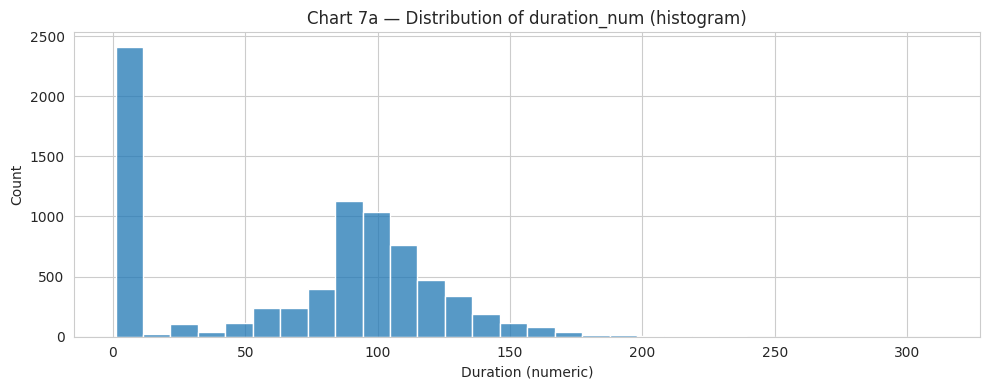

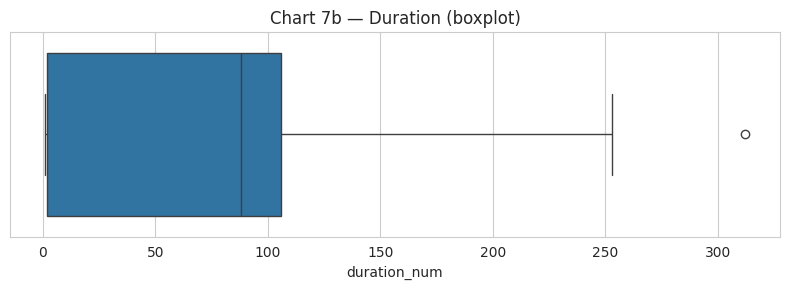

Median duration (where numeric): 88.0


In [22]:
# Duration numeric distribution
if 'duration_num' in df.columns and df['duration_num'].notna().sum()>0:
    # Histogram
    plt.figure(figsize=(10,4))
    sns.histplot(df['duration_num'].dropna(), bins=30, kde=False)
    plt.title("Chart 7a — Distribution of duration_num (histogram)")
    plt.xlabel("Duration (numeric)")
    plt.tight_layout()
    plt.show()
    # Boxplot
    plt.figure(figsize=(8,3))
    sns.boxplot(x=df['duration_num'].dropna())
    plt.title("Chart 7b — Duration (boxplot)")
    plt.tight_layout()
    plt.show()
    print("Median duration (where numeric):", df['duration_num'].median())
else:
    print("ℹ️ Skipped Chart 7 — duration numeric column missing.")

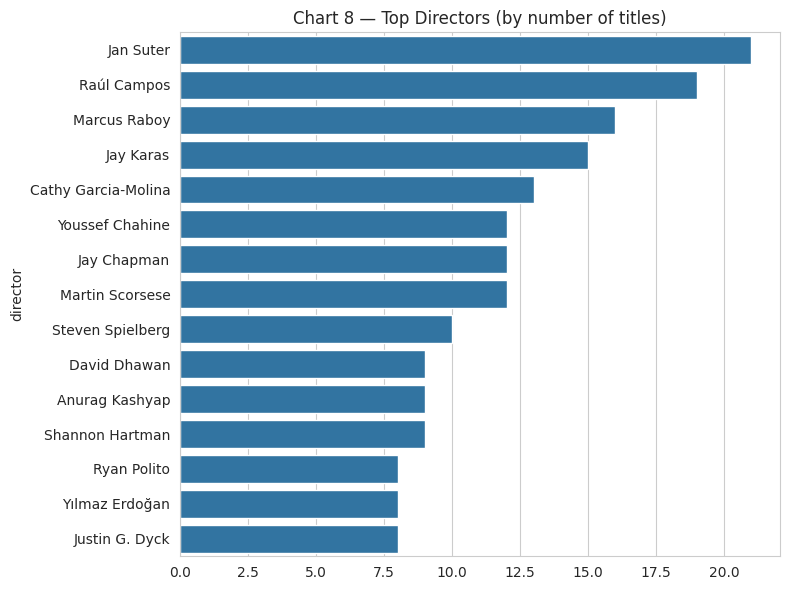

,count
director,
Jan Suter,21
Raúl Campos,19
Marcus Raboy,16
Jay Karas,15
Cathy Garcia-Molina,13
Youssef Chahine,12
Jay Chapman,12
Martin Scorsese,12
Steven Spielberg,10


In [24]:
# Top directors
if 'director' in df.columns:
    top_directors = df['director'].dropna().astype(str).str.split(',').explode().str.strip().value_counts().head(15)
    if not top_directors.empty:
        plt.figure(figsize=(8,6))
        ax = sns.barplot(x=top_directors.values, y=top_directors.index)
        ax.set_title("Chart 8 — Top Directors (by number of titles)")
        plt.tight_layout()
        plt.show()
        display(top_directors)
    else:
        print("No director data to display.")
else:
    print("ℹ️ Skipped Chart 8 — 'director' missing.")

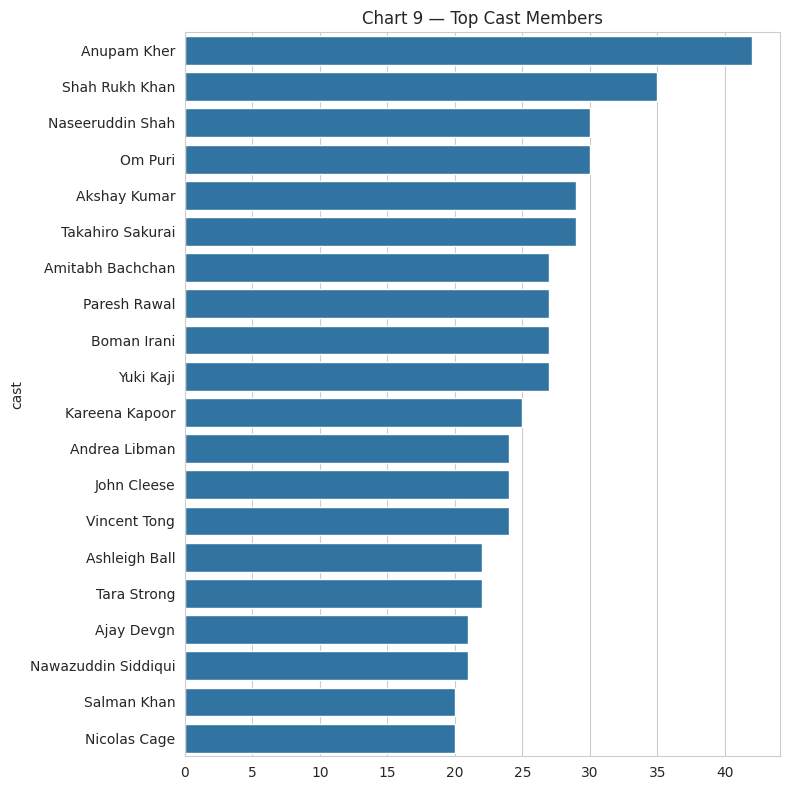

,count
cast,
Anupam Kher,42
Shah Rukh Khan,35
Naseeruddin Shah,30
Om Puri,30
Akshay Kumar,29
Takahiro Sakurai,29
Amitabh Bachchan,27
Paresh Rawal,27
Boman Irani,27


In [25]:
# Top cast members
if 'cast' in df.columns:
    top_cast = df['cast'].dropna().astype(str).str.split(',').explode().str.strip().value_counts().head(20)
    if not top_cast.empty:
        plt.figure(figsize=(8,8))
        ax = sns.barplot(x=top_cast.values, y=top_cast.index)
        ax.set_title("Chart 9 — Top Cast Members")
        plt.tight_layout()
        plt.show()
        display(top_cast.head(20))
    else:
        print("No cast data to display.")
else:
    print("ℹ️ Skipped Chart 9 — 'cast' missing.")

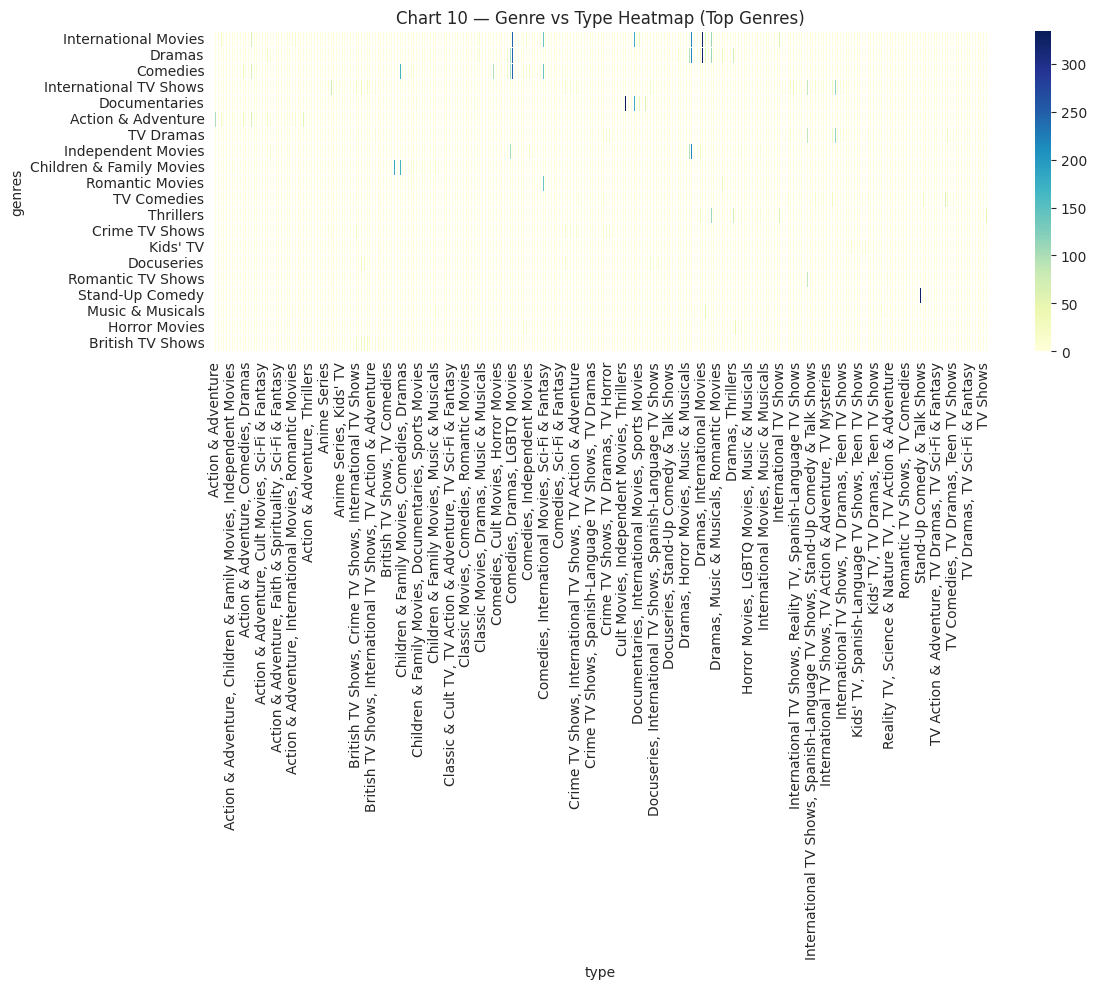

In [27]:
if 'genres' in df.columns and 'type' in df.columns:
    exp = df.explode('genres')
    exp = exp.dropna(subset=['genres'])
    cross = pd.crosstab(exp['genres'], exp['type'])
    top_genres_for_heatmap = cross.sum(axis=1).sort_values(ascending=False).head(20).index
    plt.figure(figsize=(12,10))
    sns.heatmap(cross.loc[top_genres_for_heatmap], cmap='YlGnBu', linewidths=.5)
    plt.title("Chart 10 — Genre vs Type Heatmap (Top Genres)")
    plt.tight_layout()
    plt.show()
else:
    print("ℹ️ Skipped Chart 10 — need both 'genres' and 'type'.")

In [28]:
insights = []

# Type share
if 'type' in df.columns:
    type_share = (df['type'].value_counts(normalize=True).mul(100).round(2)).to_dict()
    insights.append("Content Mix (Movie vs TV): " + str(type_share))

# Top genres
if 'genres' in df.columns:
    top3g = df['genres'].explode().value_counts().head(3).index.tolist()
    insights.append("Top 3 Genres: " + ", ".join(top3g))

# Top countries
if 'countries' in df.columns:
    top3c = df['countries'].explode().value_counts().head(3).index.tolist()
    insights.append("Top 3 Countries: " + ", ".join(top3c))

# Recent yearly trend
year_col = next((c for c in ['added_year','release_year','release_date_year'] if c in df.columns), None)
if year_col:
    recent = df[year_col].dropna().astype(int)
    if not recent.empty:
        insights.append(f"Median year of titles (based on {year_col}): {int(recent.median())}")

# Duration median
if 'duration_num' in df.columns:
    med_dur = df['duration_num'].median()
    insights.append(f"Median duration (numeric): {med_dur}")

print("=== Automated Insights ===")
for i, it in enumerate(insights,1):
    print(f"{i}. {it}")

# Save insights and cleaned CSV for download
with open("auto_insights.txt","w") as f:
    for it in insights:
        f.write(it + "\n")

clean_name = "Netflix_Cleaned_TejasV.csv"
df.to_csv(clean_name, index=False)
print(f"\nSaved cleaned CSV as: {clean_name} and insights as auto_insights.txt")

=== Automated Insights ===
1. Content Mix (Movie vs TV): {'Documentaries': 4.29, 'Stand-Up Comedy': 4.12, 'Dramas, International Movies': 4.11, 'Comedies, Dramas, International Movies': 3.12, 'Dramas, Independent Movies, International Movies': 2.76, "Kids' TV": 2.63, 'Children & Family Movies': 2.27, 'Documentaries, International Movies': 2.21, 'Children & Family Movies, Comedies': 2.17, 'Comedies, International Movies': 2.07, 'Dramas, International Movies, Romantic Movies': 1.96, 'Comedies, International Movies, Romantic Movies': 1.79, 'Action & Adventure, Dramas, International Movies': 1.5, 'Dramas': 1.5, 'International TV Shows, TV Dramas': 1.43, 'Dramas, International Movies, Thrillers': 1.4, 'Crime TV Shows, International TV Shows, TV Dramas': 1.36, 'Comedies, Dramas, Independent Movies': 1.3, 'Action & Adventure': 1.27, 'Comedies': 1.25, 'Dramas, Independent Movies': 1.21, "Kids' TV, TV Comedies": 1.16, 'Action & Adventure, International Movies': 1.13, 'International TV Shows, Ro

In [29]:
from google.colab import files

files_to_download = []
if os.path.exists("Netflix_Cleaned_TejasV.csv"):
    files_to_download.append("Netflix_Cleaned_TejasV.csv")
if os.path.exists("auto_insights.txt"):
    files_to_download.append("auto_insights.txt")

for f in files_to_download:
    print("Preparing download for:", f)
    files.download(f)

if not files_to_download:
    print("No files available for download. Make sure the save cells ran successfully.")

Preparing download for: Netflix_Cleaned_TejasV.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Preparing download for: auto_insights.txt


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>